## aprori Algorithm

In [42]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [1]:
import mlxtend
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [3]:
data = np.array([
    ['우유', '기저귀', '쥬스'],
    ['양상추', '기저귀', '맥주'],
    ['우유', '양상추', '기저귀', '쥬스'],
    ['양상추', '맥주']
])

In [4]:
te = TransactionEncoder()

In [5]:
te_ary = te.fit(data).transform(data)
te_ary

array([[ True, False, False,  True,  True],
       [ True,  True,  True, False, False],
       [ True, False,  True,  True,  True],
       [False,  True,  True, False, False]])

In [6]:
te.columns_

['기저귀', '맥주', '양상추', '우유', '쥬스']

In [7]:
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,기저귀,맥주,양상추,우유,쥬스
0,True,False,False,True,True
1,True,True,True,False,False
2,True,False,True,True,True
3,False,True,True,False,False


In [8]:
result=apriori(df, min_support=0.5, use_colnames=True) ##지지도 구하기
result

,support,itemsets
0,0.75,(기저귀)
1,0.50,(맥주)
2,0.75,(양상추)
3,0.50,(우유)
4,0.50,(쥬스)
5,0.50,"(양상추, 기저귀)"
6,0.50,"(기저귀, 우유)"
7,0.50,"(쥬스, 기저귀)"
8,0.50,"(맥주, 양상추)"
9,0.50,"(쥬스, 우유)"


In [9]:
#result에서 마지막 itemsets컬럼값 추출
r=result.iloc[10].itemsets
print(r)

frozenset({'쥬스', '기저귀', '우유'})


#### 지지도 기반 추론! 
##### 쥬스+우유를 함께 산 사람에게 추천을 해준다고 한다면 맥주보다는 기저귀를 추천해야함

In [10]:
## 원한 잇코딩 방식의 테이블이 필요
## 실제로는 물건의 개수가 아주 많음

#388개의 물건, 800명의 유저, /.... 800*388


In [11]:
df1=pd.read_csv("../csv-data/추천시스템분석데이터(협업,컨텐츠).csv", encoding="cp949")

In [12]:
df1=df1.dropna()

In [13]:
df1

,info_idx,product_idx,payment_method,user_id,payment_total,recipient_info,recipient_addr,purchase_product,purchase_quantity,payment_date
0,1.0,1.0,신용카드,1234,49900.0,jinhui99,서울시 용산구,[NF] 핀턱 아일렛 원피스 (CHARCOAL)_F22QD321,5.0,2022-04-19 23:16
1,2.0,3.0,신용카드,aaaaaa1234,49900.0,jinhui99,서울시 용산구,핀턱 셔츠 롱 원피스 레이온블랙 MDOP043RNBLACK,3.0,2022-04-19 23:29
2,3.0,4.0,무통장입금,ad123,49900.0,addr,서울시 용산구,[쿨탠다드] 우먼즈 피케 폴로 원피스 [블랙],3.0,2022-04-19 23:29
3,4.0,5.0,무통장입금,addr,49900.0,user1,경기도 군포,[쿨탠다드] 우먼즈 피케 폴로 원피스 [네이비],4.0,2022-04-19 23:44
4,5.0,6.0,신용카드,admin,49900.0,rtavnerlu,경기도 부천,라이 맥시 롱 원피스 black[블랙],5.0,2022-04-19 23:48
...,...,...,...,...,...,...,...,...,...,...
797,798.0,310.0,무통장입금,qwer,49900.0,mmorey84,521 Roth Parkway,(W) CGC 루즈핏 피케 원피스 네이비,3.0,2022-04-19 23:48
798,799.0,311.0,신용카드,sdf,49900.0,pturoneft,7 Amoth Alley,블랙 골지 슬림핏 롱 원피스 (112571AC15),3.0,2022-04-20 23:32
799,800.0,311.0,신용카드,son,49900.0,rkeydena4,0908 Comanche Drive,클래식 타이트 서머 드레스 - 블랙 / HC2039,5.0,2022-04-20 23:33
800,801.0,311.0,신용카드,use06048,49900.0,fcovottilp,92 Eagle Crest Street,빅 카라 트위드 자켓 드레스 (퍼플),4.0,2022-04-20 23:44


In [14]:
## 임베딩
!pip install gensim

In [15]:
from gensim.models import Word2Vec

In [16]:
doc = [
    'you say goodbye and I say hello', 
    'i say happy or he said white',
    'we say unhappy and angry black'
]

In [17]:
doc2 = [
    '나는 굿바이라고 했고, 너는 헬로우라고 했어.', 
    '나는 기쁘다고 했고, 너는 하얗게 슬프다고 했어.',
    '우리는 행복하지 않고, 블랙으로 슬퍼'
]

In [18]:
sentences = [ one.split(' ') for one in doc ] 
#[처리내용 for one in 복수형태의자료구조] => 항상 결과는 리스트
sentences

[['you', 'say', 'goodbye', 'and', 'I', 'say', 'hello'],
 ['i', 'say', 'happy', 'or', 'he', 'said', 'white'],
 ['we', 'say', 'unhappy', 'and', 'angry', 'black']]

In [19]:
sentences2 = [ one.split(' ') for one in doc2 ] 
sentences2

[['나는', '굿바이라고', '했고,', '너는', '헬로우라고', '했어.'],
 ['나는', '기쁘다고', '했고,', '너는', '하얗게', '슬프다고', '했어.'],
 ['우리는', '행복하지', '않고,', '블랙으로', '슬퍼']]

In [21]:
model = Word2Vec(window=1, min_count=1) #특정한 단어의 앞뒤 단어를 유추가능
#window : 유추하는 계산을 할때 특정한 단어의 앞뒤 몇개를  가지고 계산을 할지의 단위
#min_count : 특정패턴의 출현횟수 

In [22]:
model.build_vocab(sentences)

In [25]:
model.wv.most_similar('happy') 

[('hello', 0.12813478708267212),
 ('i', 0.10941850394010544),
 ('said', 0.10889007151126862),
 ('say', 0.06285080313682556),
 ('white', 0.05048206076025963),
 ('he', 0.02680680900812149),
 ('we', 0.020000366494059563),
 ('or', 0.01502519566565752),
 ('angry', 0.012979947961866856),
 ('I', -0.001197830424644053)]

In [26]:
#한글
model2 = Word2Vec(window=1, min_count=1)

In [28]:
model2.build_vocab(sentences2)

In [31]:
# model2.wv.most_similar('나는') 
model2.wv.most_similar('너는') 

[('했어.', 0.13149002194404602),
 ('슬프다고', 0.07497556507587433),
 ('굿바이라고', 0.0679759532213211),
 ('기쁘다고', 0.04157735034823418),
 ('않고,', 0.04130808264017105),
 ('행복하지', 0.012979946099221706),
 ('슬퍼', 0.006598414853215218),
 ('블랙으로', -0.009253432042896748),
 ('했고,', -0.013514961116015911),
 ('하얗게', -0.0136797446757555)]

In [32]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [35]:
tfidf = TfidfVectorizer(stop_words='english')#불용어 처리가 가능한 tfidf생성
#tfidf는 빈도수를 구하긴 하지만 문서마다 자주등장하는 문서는 각 문서를 구분할 단어로
##사용하기엔 부적합하여 가중치를 낮추어 계산

In [37]:
tfidf_matrix = tfidf.fit_transform(doc) ## 객체.. 
print('TF-IDF 행렬의 크기(shape) :',tfidf_matrix.shape)
# (3, 9) = > 3은 문장의 갯수 
#        = > 9는 단어의 갯수

TF-IDF 행렬의 크기(shape) : (3, 9)


In [38]:
tfidf_matrix.toarray()

array([[0.        , 0.        , 0.54270061, 0.        , 0.54270061,
        0.        , 0.64105545, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.54645401, 0.        ,
        0.54645401, 0.32274454, 0.        , 0.54645401],
       [0.54645401, 0.54645401, 0.        , 0.        , 0.        ,
        0.        , 0.32274454, 0.54645401, 0.        ]])

In [39]:
cosine_similarity(tfidf_matrix,tfidf_matrix )

array([[1.        , 0.20689715, 0.20689715],
       [0.20689715, 1.        , 0.10416404],
       [0.20689715, 0.10416404, 1.        ]])

In [42]:
#[1.        , 0.20689715, 0.20689715],
# [0.20689715, 1.        , 0.10416404],
# [0.20689715, 0.10416404, 1.        ]

# 문서 1 + 문서 2 : 0.21    => 유사하다
# 문서 1 + 문서 3 : 0.21   => 유사하다
# 문서 3 + 문서 2 : 0.10    => 유사하지않다. 

In [46]:
re= cosine_similarity(te_ary, te_ary) 
re

array([[1.        , 0.33333333, 0.8660254 , 0.        ],
       [0.33333333, 1.        , 0.57735027, 0.81649658],
       [0.8660254 , 0.57735027, 1.        , 0.35355339],
       [0.        , 0.81649658, 0.35355339, 1.        ]])

In [45]:
#[1.        , 0.33333333, 0.8660254 , 0.        ],
# [0.33333333, 1.        , 0.57735027, 0.81649658],
#    [0.8660254 , 0.57735027, 1.        , 0.35355339],
#[0.        , 0.81649658, 0.35355339, 1.        ]

# 장바구니 1 + 장바구니 2 : 0.33   => 유사하다
# 장바구니 1 + 장바구니 3 : 0.86   => 매우 유사하다
# 장바구니 1 + 장바구니 4 : 0   => 유사하지않다. 
# 장바구니 2 + 장바구니 3 : 0.57    => 유사하다
# 장바구니 2 + 장바구니 4 : 0.81    => 매우 유사하다
# 장바구니 3 + 장바구니 4 : 0.35    => 유사하다

#-------------------------------------------------
# 장바구니 1과 3 매우 유사, 장바구니 2, 4 매우 유사


#장바구니 1번과 제일 유사도가 높은 바구니는 3   .... > 양상추 추천


In [53]:
import numpy as np
import matplotlib.font_manager as fm
from matplotlib import rc
fm._rebuild()
fm.get_fontconfig_fonts()

# 디렉토리 및 파일 이름에 맞추어 변경
font_location = '../NanumSquareRoundEB.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

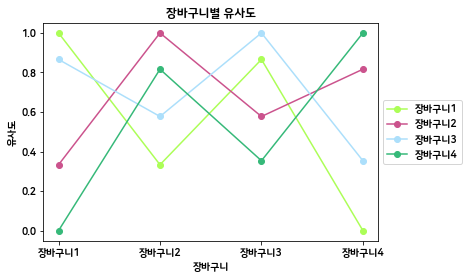

In [68]:
#유사도 그래프로 그리기
plt.title("장바구니별 유사도")
plt.xlabel("장바구니")
plt.ylabel("유사도")
x=['장바구니1', '장바구니2', '장바구니3', '장바구니4']
for i, array in enumerate(re):
    plt.plot(x, array, color = np.random.rand(3, ), marker = "o", label = f"장바구니{i+1}")
    
plt.legend(loc = "center left", bbox_to_anchor=(1, 0.5))
plt.show()